In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
@njit
def S(x,y,t,v=5):
    T = 20
    signal = np.zeros(shape=(len(t), len(x), len(y)))
    for x_ in x:
        for y_ in y:
            for t_ in t:
                signal[t_,x_,y_] = np.sin(2 * np.pi * 1/T * y_ + 2 * np.pi * 5/T * x_ + v*t_)
                      
    return signal

x = np.arange(20)
y = x
t = np.arange(1000)

In [3]:
s = S(x,y,t)

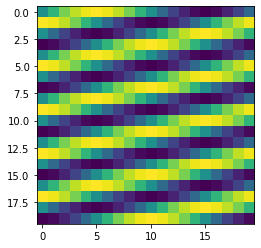

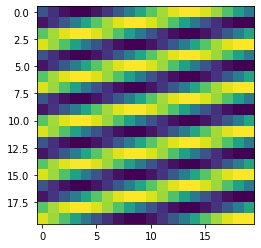

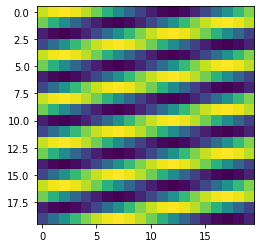

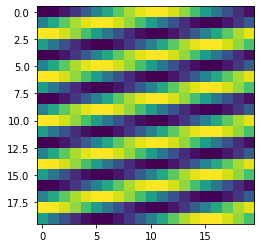

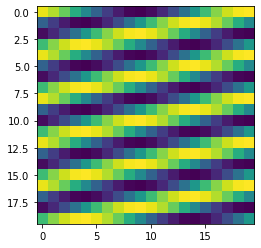

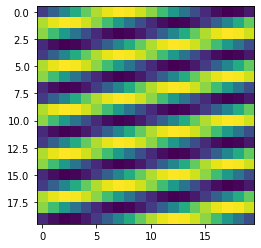

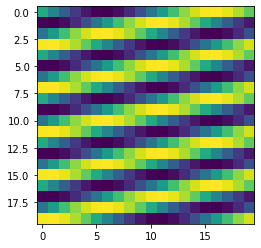

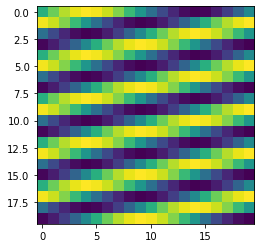

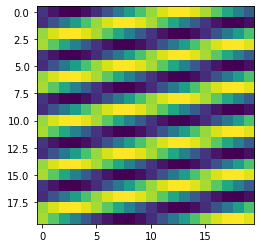

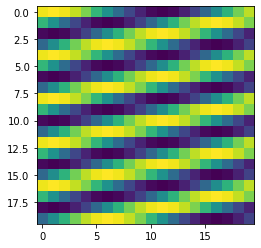

In [4]:
num_plots=1000
#fig, ax = plt.subplots(1,1, figsize=(10,10))
for i in range(num_plots):
    if i % 100 == 0:
        plt.imshow(s[i,:,:])
        plt.pause(0.0001)
plt.show()

In [5]:
def mapogram(signal, bins = None):

    original_shape = signal.shape
    signal = signal.flatten()
    num_points = signal.shape[0]

    bins = int(np.sqrt(num_points)) if bins is None else bins
    
    hist, bin_edges = np.histogram(a=signal, bins=bins)
    indices = np.digitize(signal, bins=bin_edges, right=True) - 1 

    
    m = np.zeros(shape=(bins, num_points))
    for b in range(bins):
        idx_b = np.where(indices==b)[0]
        m[b, idx_b] = 1/idx_b.shape[0]
        
    m = m.reshape((bins, *original_shape))
    return m

In [6]:
def discretize(signal, bins = None):
    
    original_shape = signal.shape
    signal = signal.flatten()

    bins = int(np.sqrt(signal.shape[0])) if bins is None else bins
    
    hist, bin_edges = np.histogram(a=signal, bins=bins)
    
    indices = np.digitize(signal, bins=bin_edges, right=True) - 1 
    
    binned_signal = bin_edges[[indices]]
    
    binned_signal = binned_signal.reshape(original_shape)
    
    return binned_signal




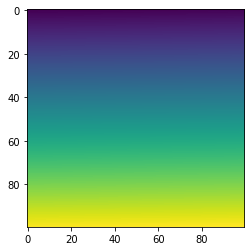

/var/folders/hh/gvd3tll943q8s5yxfl3njddr0000gn/T/ipykernel_11975/3863293453.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  binned_signal = bin_edges[[indices]]


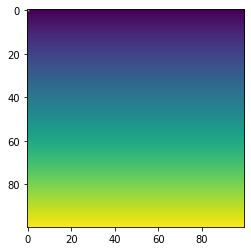

10000 101


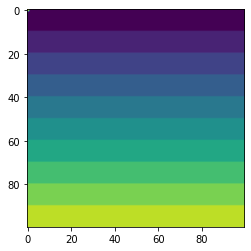

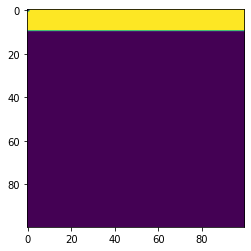

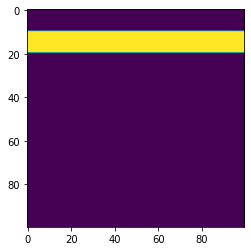

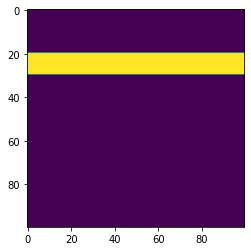

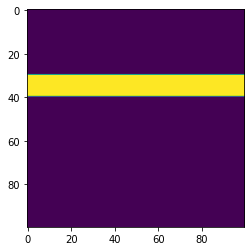

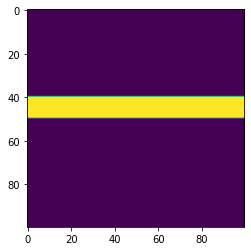

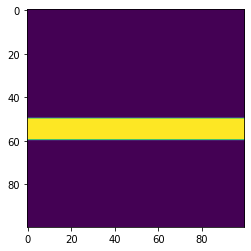

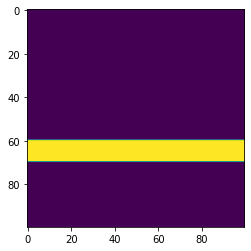

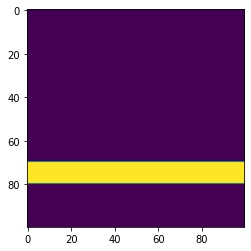

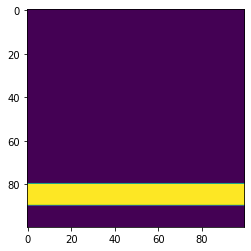

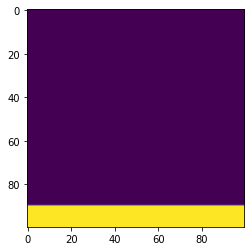

In [7]:
x = np.arange(10000) + np.random.rand(10000)
x = x.reshape(100,100)

plt.imshow(x)
plt.show()

plt.imshow(discretize(x))
plt.show()

print(len(set(x.flatten().tolist())), len(set(discretize(x).flatten().tolist())))

assert not np.array_equal(x, discretize(x))

plt.imshow(discretize(x, bins = 10))
plt.show()


m = mapogram(x, bins = 10)
for s in range(m.shape[0]):
    plt.imshow(m[s, :])
    plt.show()

In [8]:
def S(x, y, t, v=5):
    T = 40
    signal = np.zeros(shape=(len(t), len(x), len(y)))
    for x_ in x:
        for y_ in y:
            for t_ in t:
                signal[t_, x_, y_] = np.sin(2 * np.pi * 1/T * y_ + 2 * np.pi * 5/T * x_ + v*t_)

    return signal

x = np.arange(30)
y = x
t = np.arange(100)

signal = S(x, y, t)
signal.shape

(100, 30, 30)

In [9]:
m = mapogram(signal, bins=3)
m.shape

(3, 100, 30, 30)

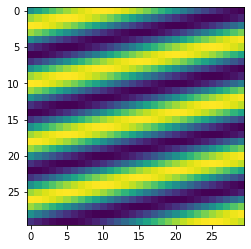

/var/folders/hh/gvd3tll943q8s5yxfl3njddr0000gn/T/ipykernel_11975/3863293453.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  binned_signal = bin_edges[[indices]]


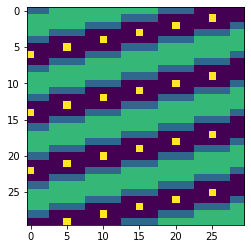

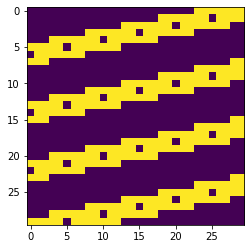

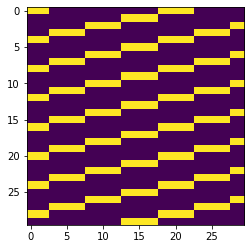

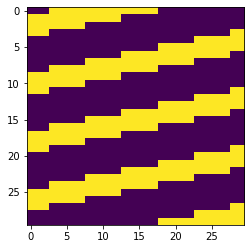

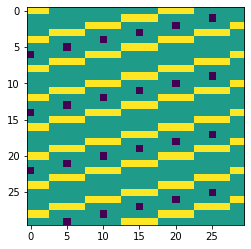

In [14]:
plt.imshow(signal[0])
plt.show()

plt.imshow(discretize(signal[0], bins=3))
plt.show()
for s in range(m.shape[0]):
    plt.imshow(m[s,0, :])
    plt.show()
    
plt.imshow(m[:,0, :].sum(axis=0))
plt.show()

In [15]:
m.shape

(3, 100, 30, 30)

In [19]:
m.transpose((1, 0, 2, 3)).shape

(100, 3, 30, 30)

In [ ]:
def bhattacharyya(m1,m2):
    m1 = m1.reshape(m1.shape[0], -1)
    m2 = m2.reshape(m2.shape[0], -1)
    assert m1.shape == m2.shape
    
    np.sqrt(m1*m2/(m1.sum(axis=1)*m2.sum(axis=1)).sum(axis=1)

In [6]:
np.arange(10)**(0.5)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])